In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/ASUS/OneDrive/Documents/data science/DS Assignments/simple linear regg/delivery_time.csv")
df
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Exploratory Data Analysis 

In [2]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [3]:
df["Sorting Time"].kurt()
df["Delivery Time"].kurt()


0.31795982942685397

In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


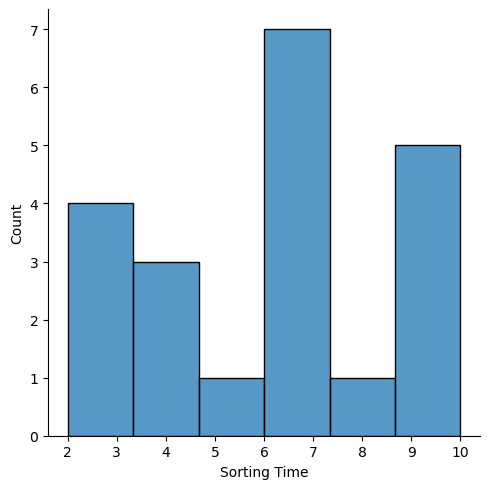

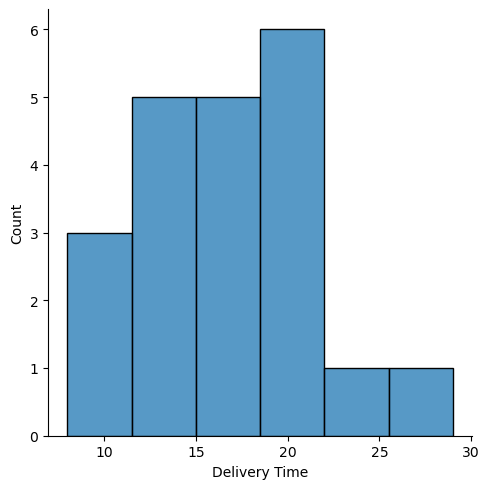

In [5]:
import seaborn as sns
sns.displot(df["Sorting Time"])
sns.displot(df["Delivery Time"])

In [6]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

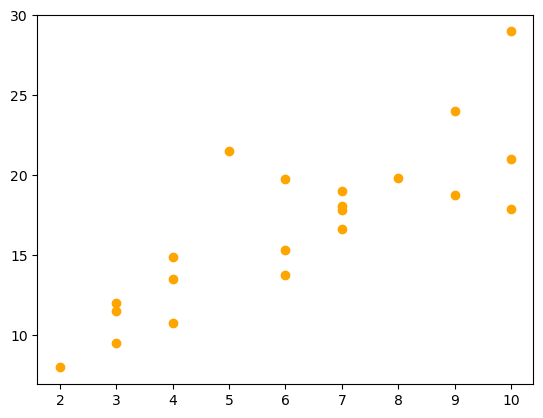

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x= df["Sorting Time"], y = df["Delivery Time"],color = "Orange")

<Axes: >

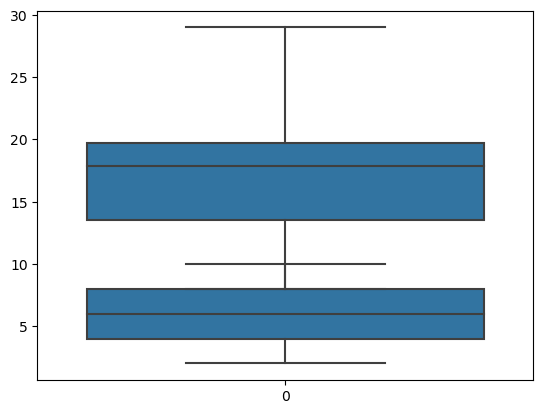

In [8]:
import seaborn as sns
sns.boxplot(df["Sorting Time"])
sns.boxplot(df["Delivery Time"])

<Axes: xlabel='Delivery Time'>

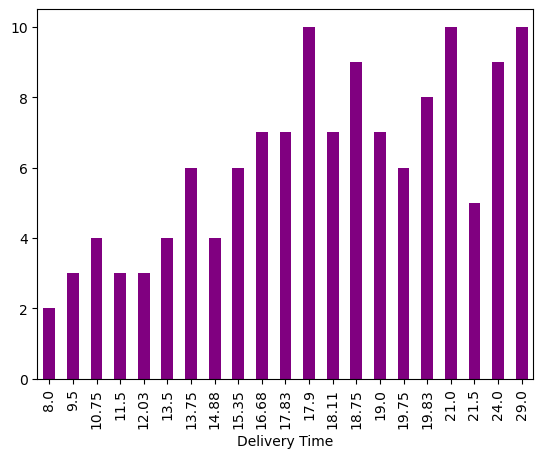

In [9]:
t1 = df.groupby("Delivery Time").sum()
t1["Sorting Time"].plot(kind="bar",color ="purple")

In [10]:
x=df[["Sorting Time"]]
y = df["Delivery Time"]

## Model Building

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state = 12)
x_train.shape
x_test.shape

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_train= lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print(y_pred_train)
print(y_pred_test)

[10.6425367  12.64236542  8.64270799 16.64202284 24.64133768 12.64236542
 18.64185155 24.64133768 18.64185155 16.64202284 22.64150897 16.64202284
 18.64185155 18.64185155 12.64236542]
[10.6425367  22.64150897 20.64168026 14.64219413 10.6425367  24.64133768]


## Evaluating Performance using Metrics

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred_train)
print("The training mean square error is ",mse.round(2))
print("The training Root mean square error",np.sqrt(mse.round(2)))
mse = mean_squared_error(y_test, y_pred_test)
print("The testing mean square error is ",mse.round(2))
print("The testing Root mean square error",np.sqrt(mse.round(2)))

The training mean square error is  4.69
The training Root mean square error 2.1656407827707715
The testing mean square error is  18.39
The testing Root mean square error 4.288356328478313


In [13]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,y_pred_train)
print("R square of training data:", r2.round(3))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred_test)
print("R square of test data:", r2.round(3))



R square of training data: 0.823
R square of test data: 0.058


Text(0, 0.5, 'Delivery Time')

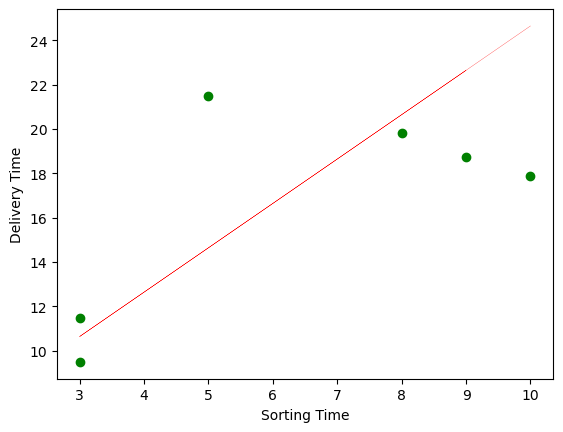

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x_test,y_test,color = "green")
plt.plot(x_test,y_pred_test,color= "red",linewidth= 0.2)
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

## Logarithmic transformation

In [15]:
# By applying Logarithmic transformation 
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
trf = FunctionTransformer(func= np.log1p)
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.fit_transform(x_test)


In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_trf,y_train)
y_pred_train_trf= lr.predict(x_train_trf)
y_pred_test_trf = lr.predict(x_test_trf)
print(y_pred_train_trf)
print(y_pred_test_trf)

[10.39032193 13.19732115  6.77147052 17.42992075 23.11559655 13.19732115
 19.10965791 23.11559655 19.10965791 17.42992075 21.91665713 17.42992075
 19.10965791 19.10965791 13.19732115]
[10.39032193 21.91665713 20.59129109 15.49080651 10.39032193 23.11559655]


In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred_train_trf)
print("The training mean square error is ",mse.round(2))
print("The training Root mean square error",np.sqrt(mse.round(2)))
mse = mean_squared_error(y_test, y_pred_test_trf)
print("The testing mean square error is ",mse.round(2))
print("The testing Root mean square error",np.sqrt(mse.round(2)))


The training mean square error is  5.89
The training Root mean square error 2.4269322199023193
The testing mean square error is  12.66
The testing Root mean square error 3.558089374931439


In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,y_pred_train_trf)
print("R square of training data:", r2.round(3))
r2 = r2_score(y_test,y_pred_test_trf)
print("R square of testing data:", r2.round(3))


R square of training data: 0.778
R square of testing data: 0.352


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22036\3865179132.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf)


<Axes: ylabel='Density'>

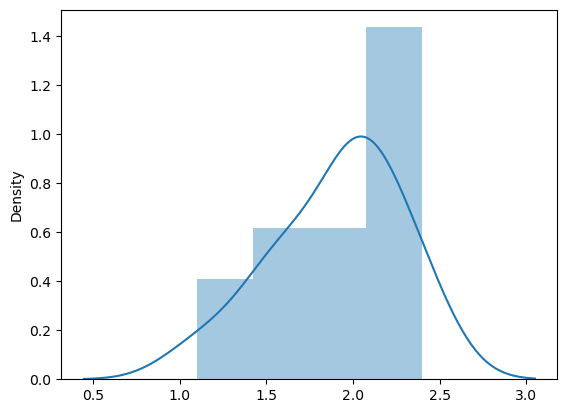

In [19]:
import seaborn as sns
sns.distplot(x_train_trf)

## Square Root transformation

In [20]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
trf = FunctionTransformer(func= np.sqrt)
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.fit_transform(x_test)



In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_trf,y_train)
y_pred_train_trf= lr.predict(x_train_trf)
y_pred_test_trf = lr.predict(x_test_trf)
print(y_pred_train_trf)
print(y_pred_test_trf)

[10.42168881 12.92350016  7.45407834 17.12033513 23.77555542 12.92350016
 18.95280723 23.77555542 18.95280723 17.12033513 22.26038723 17.12033513
 18.95280723 18.95280723 12.92350016]
[10.42168881 22.26038723 20.65843067 15.12764021 10.42168881 23.77555542]


In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred_train_trf)
print("The training mean square error is ",mse.round(2))
print("The training Root mean square error",np.sqrt(mse.round(2)))
mse = mean_squared_error(y_test, y_pred_test_trf)
print("The test mean square error is ",mse.round(2))
print("The test Root mean square error",np.sqrt(mse.round(2)))

The training mean square error is  5.22
The training Root mean square error 2.2847319317591723
The test mean square error is  15.03
The test Root mean square error 3.8768543949960255


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,y_pred_train_trf)
print("R square of training data:", r2.round(3))
r2 = r2_score(y_test,y_pred_test_trf)
print("R square of testing data:", r2.round(3))


R square of training data: 0.803
R square of testing data: 0.23


##  Square transformation

In [24]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
trf = FunctionTransformer(func= np.square)
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.fit_transform(x_test)





In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_trf,y_train)
y_pred_train_trf= lr.predict(x_train_trf)
y_pred_test_trf = lr.predict(x_test_trf)
print(y_pred_train_trf)
print(y_pred_test_trf)

[11.56250771 12.66103352 10.77784642 15.7996787  25.84334328 12.66103352
 17.83979807 25.84334328 17.83979807 15.7996787  22.86163036 15.7996787
 17.83979807 17.83979807 12.66103352]
[11.56250771 22.86163036 20.19378195 14.07342385 11.56250771 25.84334328]


In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred_train_trf)
print("The training mean square error is ",mse.round(2))
print("The training Root mean square error",np.sqrt(mse.round(2)))
mse = mean_squared_error(y_test, y_pred_test_trf)
print("The testing mean square error is ",mse.round(2))
print("The testing Root mean square error",np.sqrt(mse.round(2)))

The training mean square error is  4.98
The training Root mean square error 2.23159136044214
The testing mean square error is  23.26
The testing Root mean square error 4.822862220714998


In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train,y_pred_train_trf)
print("R square of training data:", r2.round(3))
r2 = r2_score(y_test,y_pred_test_trf)
print("R square of testing data:", r2.round(3))


R square of training data: 0.812
R square of testing data: -0.192


In [ ]:
The training mean square error is  4.69
The training Root mean square error 2.1656407827707715
The testing mean square error is  18.39
The testing Root mean square error 4.288356328478313
R square of training data: 0.823
R square of test data: 0.058

    
Therefore, From above transformations we can conclude the rmse and r2_score:
Logarithmic Transformation:  
The training mean square error is  5.89
The training Root mean square error 2.4269322199023193
The testing mean square error is  12.66
The testing Root mean square error 3.558089374931439
R square of training data: 0.778
R square of testing data: 0.352
SQRT Transformation:
The training mean square error is  5.22
The training Root mean square error 2.2847319317591723
The test mean square error is  15.03
The test Root mean square error 3.8768543949960255
R square of training data: 0.803
R square of testing data: 0.23
SQUARE Transformation:
The training mean square error is  4.98
The training Root mean square error 2.23159136044214
The testing mean square error is  23.26
The testing Root mean square error 4.822862220714998
R square of training data: 0.812
R square of testing data: -0.192
